In [1]:
links = 'https://www.health.harvard.edu/heart-health/meditation-offers-significant-heart-benefits'

In [2]:
import numpy as np
import pandas as pd
import os
import datetime
import scipy
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # for linear regression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ensure plots display in the notebook
%matplotlib inline

# Plot and style settings
plt.rcParams['lines.markeredgewidth'] = 1  # for seaborn box plots
plt.rcParams['figure.figsize'] = (12, 5)

# Suppress warnings
warnings.filterwarnings('ignore')

print("Setup complete")


Setup complete


In [3]:
# Loading the data
file_path = os.path.join('data', 'sleep_p1.csv')
sleep_p1 = pd.read_csv(file_path)
file_path = os.path.join('data', 'sleep_p2.csv')
sleep_p2 = pd.read_csv(file_path)
file_path = os.path.join('data', 'sleep_p3.csv')
sleep_p3 = pd.read_csv(file_path)
file_path = os.path.join('data', 'sleep_p4.csv')
sleep_p4 = pd.read_csv(file_path)
file_path = os.path.join('data', 'sleep_p5.csv')
sleep_p5 = pd.read_csv(file_path)
file_path = os.path.join('data', 'sleep_p6.csv')
sleep_p6 = pd.read_csv(file_path)


file_path = os.path.join('data', 'temp_hr_p1.csv')
temp_hr_p1 = pd.read_csv(file_path)
file_path = os.path.join('data', 'temp_hr_p2.csv')
temp_hr_p2 = pd.read_csv(file_path)
file_path = os.path.join('data', 'temp_hr_p3.csv')
temp_hr_p3 = pd.read_csv(file_path)
file_path = os.path.join('data', 'temp_hr_p4.csv')
temp_hr_p4 = pd.read_csv(file_path)
file_path = os.path.join('data', 'temp_hr_p5.csv')
temp_hr_p5 = pd.read_csv(file_path)
file_path = os.path.join('data', 'temp_hr_p6.csv')
temp_hr_p6 = pd.read_csv(file_path)


In [25]:
# Making a new df with only the datapoints in range
temp_hr_p1_clean = temp_hr_p1[(temp_hr_p1['Heart rate'] >= 30) & (temp_hr_p1['Heart rate'] <= 90)]

# Sorting by Time and reseting the index
temp_hr_p1_clean = temp_hr_p1_clean.sort_values(by='Time').reset_index(drop=True)

# Seeing how many datapoints are out of the range (30-90)
out_of_range = temp_hr_p1[(temp_hr_p1['Heart rate'] > 90) | (temp_hr_p1['Heart rate'] < 30)]
num_out_of_range = out_of_range.shape[0]
print(f"Number of rows where heart rate > 90 or < 30: {num_out_of_range}")

temp_hr_p1_clean

min_hr = temp_hr_p1_clean['Heart rate'].min()
max_hr = temp_hr_p1_clean['Heart rate'].max()
print(f"Cleaned heart rate range: {min_hr} - {max_hr}")

Number of rows where heart rate > 90 or < 30: 12
Cleaned heart rate range: 44.0 - 90.0


In [24]:
# Making a new df with only the datapoints in range
temp_hr_p2_clean = temp_hr_p2[(temp_hr_p2['Heart rate'] >= 30) & (temp_hr_p2['Heart rate'] <= 90)]

# Sorting by Time and reseting the index
temp_hr_p2_clean = temp_hr_p2_clean.sort_values(by='Time').reset_index(drop=True)

# Seeing how many datapoints are out of the range (30-90)
out_of_range = temp_hr_p2[(temp_hr_p2['Heart rate'] > 90) | (temp_hr_p2['Heart rate'] < 30)]
num_out_of_range = out_of_range.shape[0]
print(f"Number of rows where heart rate > 90 or < 30: {num_out_of_range}")

temp_hr_p2_clean = temp_hr_p2_clean.dropna(subset=['Temperature', 'Heart rate'])

# Display cleaned data
print(temp_hr_p2_clean)

# Display cleaned data
temp_hr_p2_clean
min_hr = temp_hr_p2_clean['Heart rate'].min()
max_hr = temp_hr_p2_clean['Heart rate'].max()
print(f"Cleaned heart rate range: {min_hr} - {max_hr}")

Number of rows where heart rate > 90 or < 30: 150
       Participant                 Time  Heart rate  Temperature
513     8282961458  2025-05-20 18:11:00        83.0         26.0
514     8282961458  2025-05-20 18:21:00        75.0         26.0
515     8282961458  2025-05-20 18:31:00        80.0         26.0
516     8282961458  2025-05-20 18:41:00        80.0         26.0
517     8282961458  2025-05-20 18:51:00        79.0         26.0
...            ...                  ...         ...          ...
10042   8282961458  2025-06-12 08:41:00        71.0         22.0
10043   8282961458  2025-06-12 08:42:00        73.0         22.0
10044   8282961458  2025-06-12 08:43:00        77.0         22.0
10045   8282961458  2025-06-12 08:44:00        82.0         22.0
10046   8282961458  2025-06-12 08:45:00        81.0         22.0

[9445 rows x 4 columns]
Cleaned heart rate range: 48.0 - 90.0


In [23]:
# Making a new df with only the datapoints in range
temp_hr_p3_clean = temp_hr_p3[(temp_hr_p3['Heart rate'] >= 30) & (temp_hr_p3['Heart rate'] <= 90)]

# Sorting by Time and reseting the index
temp_hr_p3_clean = temp_hr_p3_clean.sort_values(by='Time').reset_index(drop=True)

# Seeing how many datapoints are out of the range (30-90)
out_of_range = temp_hr_p3[(temp_hr_p3['Heart rate'] > 90) | (temp_hr_p3['Heart rate'] < 30)]
num_out_of_range = out_of_range.shape[0]
print(f"Number of rows where heart rate > 90 or < 30: {num_out_of_range}")

temp_hr_p3_clean = temp_hr_p3_clean.dropna(subset=['Temperature', 'Heart rate'])

# Display cleaned data
temp_hr_p3_clean

min_hr = temp_hr_p3_clean['Heart rate'].min()
max_hr = temp_hr_p3_clean['Heart rate'].max()
print(f"Cleaned heart rate range: {min_hr} - {max_hr}")

Number of rows where heart rate > 90 or < 30: 9
Cleaned heart rate range: 44.0 - 90.0


In [21]:
# Making a new df with only the datapoints in range
temp_hr_p4_clean = temp_hr_p4[(temp_hr_p4['Heart rate'] >= 30) & (temp_hr_p4['Heart rate'] <= 90)]

# Sorting by Time and reseting the index
temp_hr_p4_clean = temp_hr_p4_clean.sort_values(by='Time').reset_index(drop=True)

# Seeing how many datapoints are out of the range (30-90)
out_of_range = temp_hr_p4[(temp_hr_p4['Heart rate'] > 90) | (temp_hr_p4['Heart rate'] < 30)]
num_out_of_range = out_of_range.shape[0]
print(f"Number of rows where heart rate > 90 or < 30: {num_out_of_range}")

# Display cleaned data
temp_hr_p4_clean

min_hr = temp_hr_p4_clean['Heart rate'].min()
max_hr = temp_hr_p4_clean['Heart rate'].max()
print(f"Cleaned heart rate range: {min_hr} - {max_hr}")

Number of rows where heart rate > 90 or < 30: 0
Cleaned heart rate range: 43.0 - 84.0


In [22]:
# Making a new df with only the datapoints in range
temp_hr_p5_clean = temp_hr_p5[(temp_hr_p5['Heart rate'] >= 30) & (temp_hr_p5['Heart rate'] <= 90)]

# Sorting by Time and reseting the index
temp_hr_p5_clean = temp_hr_p5_clean.sort_values(by='Time').reset_index(drop=True)

# Seeing how many datapoints are out of the range (30-90)
out_of_range = temp_hr_p5[(temp_hr_p5['Heart rate'] > 90) | (temp_hr_p5['Heart rate'] < 30)]
num_out_of_range = out_of_range.shape[0]
print(f"Number of rows where heart rate > 90 or < 30: {num_out_of_range}")

# Display cleaned data
temp_hr_p5_clean

min_hr = temp_hr_p5_clean['Heart rate'].min()
max_hr = temp_hr_p5_clean['Heart rate'].max()
print(f"Cleaned heart rate range: {min_hr} - {max_hr}")

Number of rows where heart rate > 90 or < 30: 1628
Cleaned heart rate range: 54 - 90


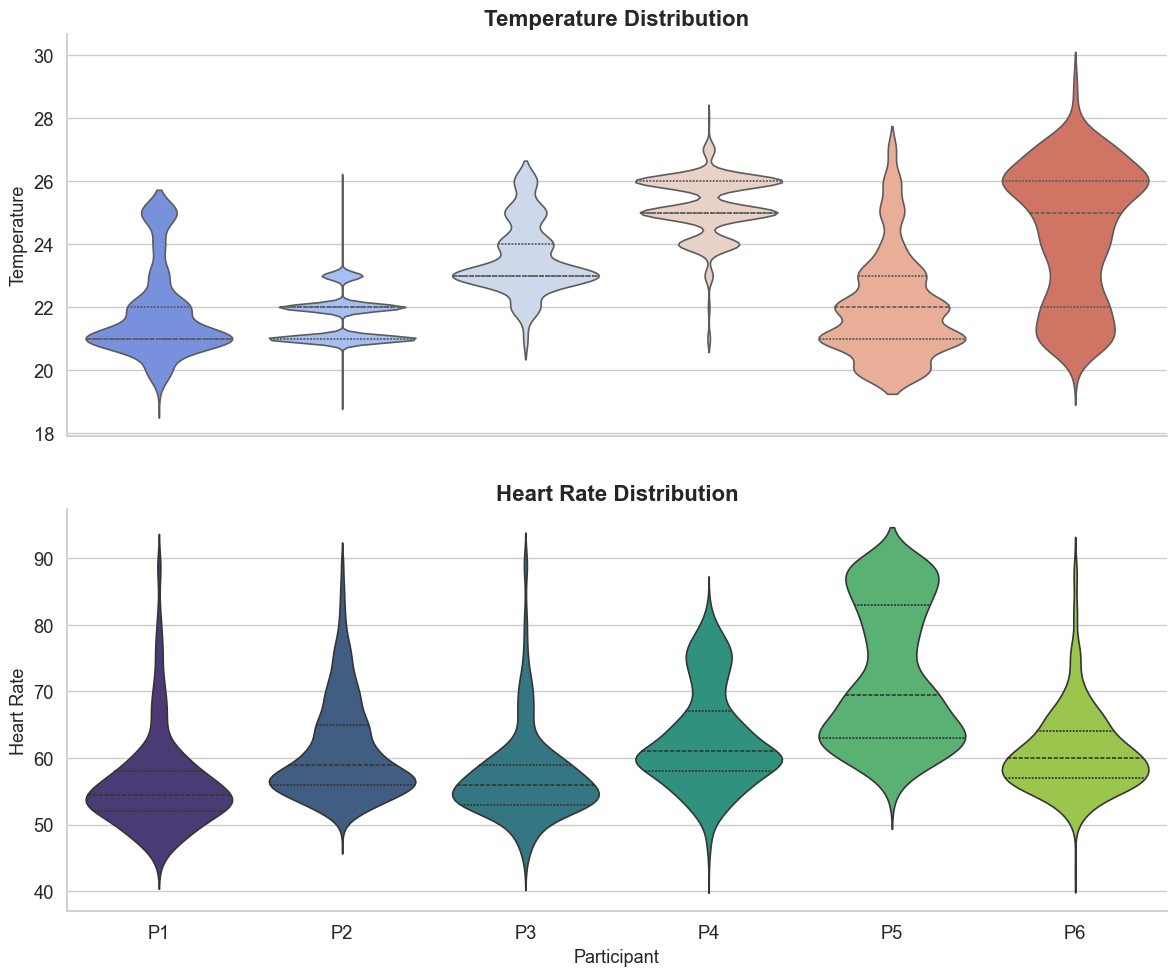

In [15]:
# Read and clean RANGE_P6.csv (if not already done)
range_p6_clean = pd.read_csv('RANGE_P6.csv')

# Prepare long-form DataFrames for temperature
temp_list = []
for i, df in enumerate([
    temp_hr_p1_clean, temp_hr_p2_clean, temp_hr_p3_clean, 
    temp_hr_p4_clean, temp_hr_p5_clean, range_p6_clean
], start=1):
    temp_df = pd.DataFrame({
        'Value': df['Temperature'],
        'Participant': f'P{i}'
    })
    temp_list.append(temp_df)
long_temp = pd.concat(temp_list, ignore_index=True)

# Prepare long-form DataFrames for heart rate
hr_list = []
for i, df in enumerate([
    temp_hr_p1_clean, temp_hr_p2_clean, temp_hr_p3_clean, 
    temp_hr_p4_clean, temp_hr_p5_clean, range_p6_clean
], start=1):
    hr_df = pd.DataFrame({
        'Value': df['Heart rate'],
        'Participant': f'P{i}'
    })
    hr_list.append(hr_df)
long_hr = pd.concat(hr_list, ignore_index=True)

# Set style and color palette
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

# Temperature Violin Plot
sns.violinplot(ax=axes[0], x='Participant', y='Value', data=long_temp, inner='quartile', linewidth=1.2, palette="coolwarm")
axes[0].set_title('Temperature Distribution', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Temperature', fontsize=13)
axes[0].set_xlabel('')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Heart Rate Violin Plot
sns.violinplot(ax=axes[1], x='Participant', y='Value', data=long_hr, inner='quartile', linewidth=1.2, palette="viridis")
axes[1].set_title('Heart Rate Distribution', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Heart Rate', fontsize=13)
axes[1].set_xlabel('Participant', fontsize=13)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout(h_pad=2)
plt.show()

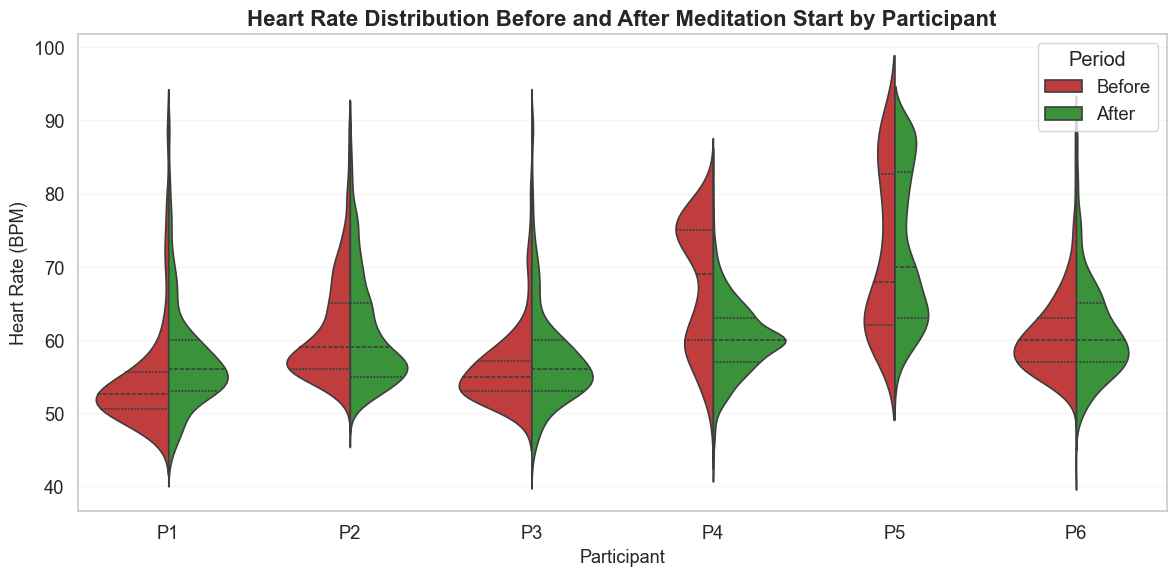

In [26]:
# Set color palette for periods
palette = {'Before': '#d62728', 'After': '#2ca02c'}
order = ['Before', 'After']

plt.figure(figsize=(12, 6))

sns.set(style="whitegrid", font_scale=1.2)
ax = sns.violinplot(
    x='Participant', 
    y='Heart rate',
    hue='Period',
    data=heart_rate_all,
    split=True,  # This argument is ignored by violinplot, so we'll get side-by-side violins
    palette=palette,
    inner='quartile',
    linewidth=1.2,
    order=[f'P{i}' for i in range(1, 7)],
    hue_order=order
)

plt.title('Heart Rate Distribution Before and After Meditation Start by Participant', fontsize=16, fontweight='bold')
plt.xlabel('Participant', fontsize=13)
plt.ylabel('Heart Rate (BPM)', fontsize=13)
plt.legend(title='Period', loc='upper right')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

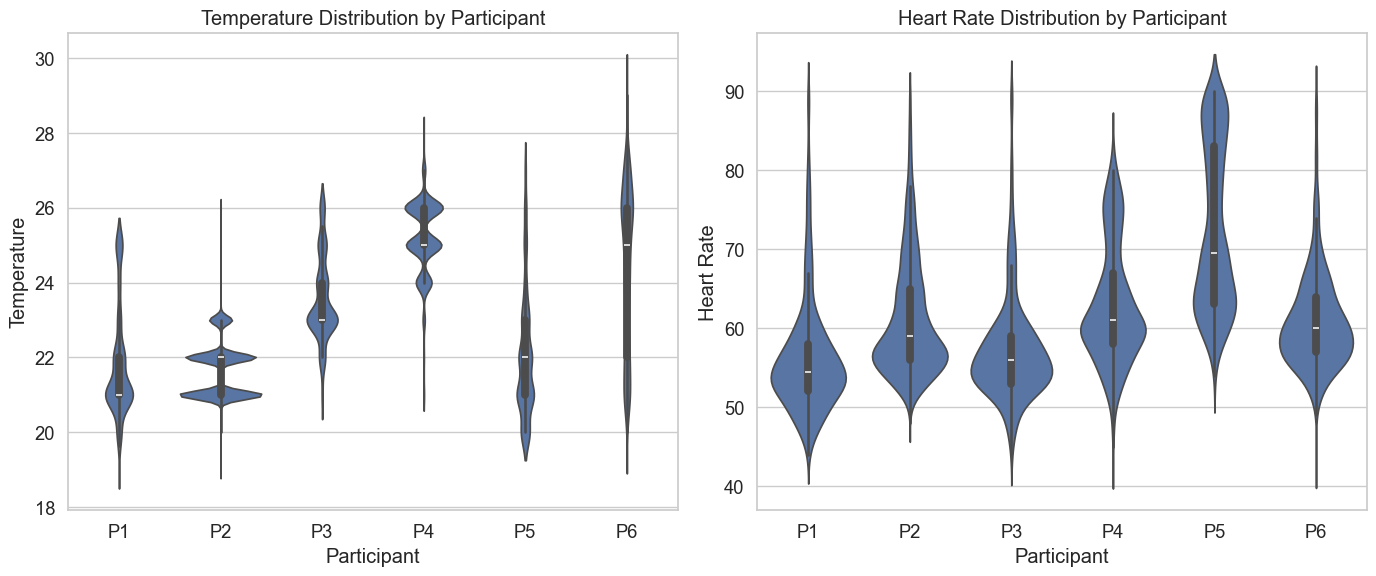

In [27]:
range_p6_clean = pd.read_csv('RANGE_P6.csv')

# Prepare long DataFrames for temperature (now including P6)
temp_list = []
for i, df in enumerate([
    temp_hr_p1_clean, temp_hr_p2_clean, temp_hr_p3_clean, 
    temp_hr_p4_clean, temp_hr_p5_clean, range_p6_clean
], start=1):
    temp_df = pd.DataFrame({
        'Value': df['Temperature'],
        'Participant': f'P{i}'
    })
    temp_list.append(temp_df)
long_temp = pd.concat(temp_list, ignore_index=True)

# Prepare long DataFrames for heart rate (including P6)
hr_list = []
for i, df in enumerate([
    temp_hr_p1_clean, temp_hr_p2_clean, temp_hr_p3_clean, 
    temp_hr_p4_clean, temp_hr_p5_clean, range_p6_clean
], start=1):
    hr_df = pd.DataFrame({
        'Value': df['Heart rate'],
        'Participant': f'P{i}'
    })
    hr_list.append(hr_df)
long_hr = pd.concat(hr_list, ignore_index=True)

plt.figure(figsize=(14, 6))

# Temperature
plt.subplot(1, 2, 1)
sns.violinplot(x='Participant', y='Value', data=long_temp)
plt.title('Temperature Distribution by Participant')
plt.ylabel('Temperature')

# Heart Rate
plt.subplot(1, 2, 2)
sns.violinplot(x='Participant', y='Value', data=long_hr)
plt.title('Heart Rate Distribution by Participant')
plt.ylabel('Heart Rate')

plt.tight_layout()
plt.show()

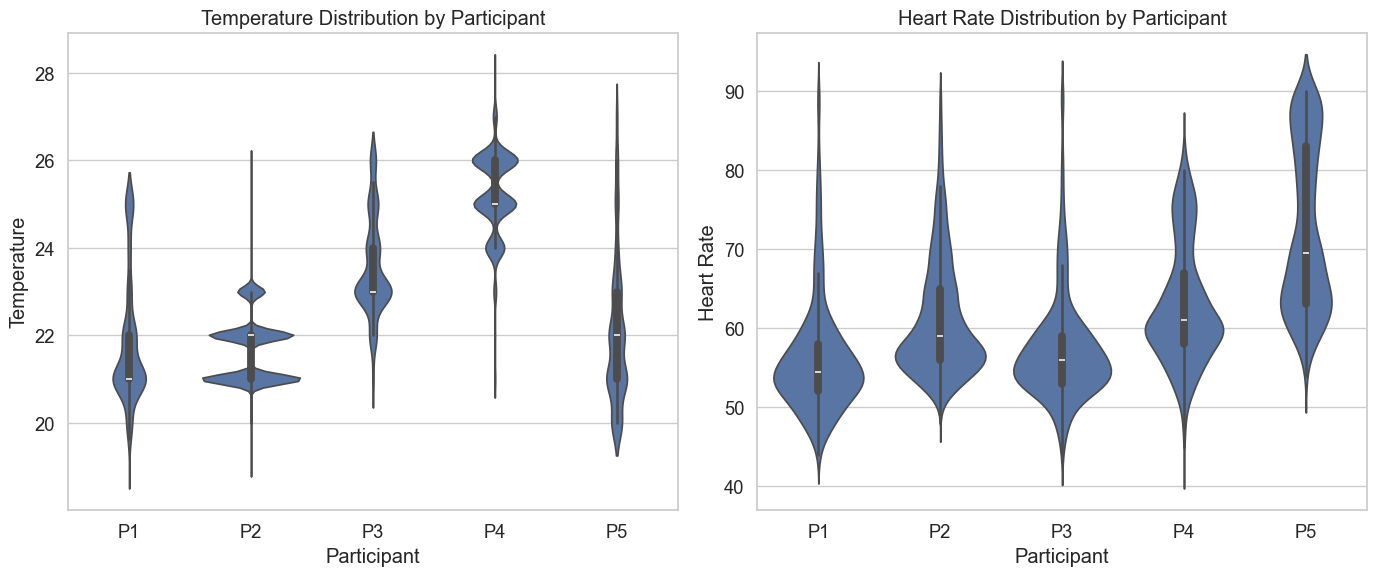

In [28]:


# Prepare long DataFrames for temperature
temp_list = []
for i, df in enumerate([temp_hr_p1_clean, temp_hr_p2_clean, temp_hr_p3_clean, temp_hr_p4_clean, temp_hr_p5_clean], start=1):
    temp_df = pd.DataFrame({
        'Value': df['Temperature'],
        'Participant': f'P{i}'
    })
    temp_list.append(temp_df)
long_temp = pd.concat(temp_list, ignore_index=True)

# Preparing long dfs for heart rate
hr_list = []
for i, df in enumerate([temp_hr_p1_clean, temp_hr_p2_clean, temp_hr_p3_clean, temp_hr_p4_clean, temp_hr_p5_clean], start=1):
    hr_df = pd.DataFrame({
        'Value': df['Heart rate'],
        'Participant': f'P{i}'
    })
    hr_list.append(hr_df)
long_hr = pd.concat(hr_list, ignore_index=True)

plt.figure(figsize=(14, 6))

# Temperature
plt.subplot(1, 2, 1)
sns.violinplot(x='Participant', y='Value', data=long_temp)
plt.title('Temperature Distribution by Participant')
plt.ylabel('Temperature')

# Heartrate
plt.subplot(1, 2, 2)
sns.violinplot(x='Participant', y='Value', data=long_hr)
plt.title('Heart Rate Distribution by Participant')
plt.ylabel('Heart Rate')

plt.tight_layout()
plt.show()

In [11]:
# Saving each df to a csv file, no index column
temp_hr_p1_clean.to_csv('RANGE_P1.csv', index=False)
temp_hr_p2_clean.to_csv('RANGE_P2.csv', index=False)
temp_hr_p3_clean.to_csv('RANGE_P3.csv', index=False)
temp_hr_p4_clean.to_csv('RANGE_P4.csv', index=False)
temp_hr_p5_clean.to_csv('RANGE_P5.csv', index=False)